# COGS 108 - Final Project 

# Overview

We wish to seek any potential connection between parks and environmental conditions in this project, especially between parks and air conditions. To achieve this goal, I took the approach of categorizing different areas of San Diego by zip code and getting the environmental indices and number of parks in each zip code area according to data-wrangling. From our analysis, we seems to be able to discover some week relationships between the number of parks and the environmental condition of an area. We can also speculate some relationships between parks and each pollution index. Unfortunately, due to the missing of geospacial data and other reasons analyzed later in this project, the relationship discovered are rather weak and we failed to reject the null hypothesis. However, I learned from this project and analyzed what should be and can be improved in my future studies.  

# Name & GitHub

- Name: Yaoyuan Zhang
- GitHub Username: YourTeammate

# Research Question

Is there any relationship between parks and pollution? How can we improve the environmental quality of San Diego by managing parks? 

## Background and Prior Work

The core purpose of city amenities including parks is improving people's living quality, and one of the most significant measurement of living quality is the environmental condition of where people lives. It is well know that most of the vegetation coverage have the effect of reducing air pollution and improving air quality. Considering that parks are the urban locations with most of the vegetation coverage in cities most of the time, it is reasonable that there are some connections between parks and environmental conditions. 

According to previous researches, Trees and vegetation in parks can help reduce air pollution both by directly removing pollutants and by lowering air temperatures and building energy use in and near parks. The economic value brought by this reduction in air pollution can worth approximately three hundred dollars per acre of tree cover [1]. From another more detailed research posted on Science Direct, we can see that an urban park has significant impacts on local air quality over time, represented by reducing carbon monoxide, nitrogen dioxide, sulfur dioxide, ozone, etc. [2]. 

On the other side, the air quality of San Diego, although not bad, still has some room for improvement. In both 2018 and 2019, San Diego County experienced an AQI, air quality index, of 52, representing 'moderate' and just exceeding the federal guidelines [3]. Besides, the severe fires that happened in California this year might aggravate the air pollution in San Diego. Hence, studying the relationship between parks and air pollution can help San Diego county to make decisions about future plans of city amenities and achieve the ultimate goal of improving people's living quality. 

References (include links):
- 1) https://www.nrpa.org/globalassets/research/nowak-heisler-summary.pdf
- 2) https://www.sciencedirect.com/science/article/pii/S1878029611000284
- 3) https://www.iqair.com/usa/california/san-diego

# Hypothesis


- My first hypothesis is that there is a relationship between parks and pollution. For a specific area, the more parks are constructed, the less pollution this area will have, and the better the environment of this area will be. The parks will reduce the amount of air pollution including but not limited to PM2.5 index and ozone. 
- My second hypothesis is that if San Diego government wish to improve the environmental quality of the city, they probably need to improve the amount of amenity like parks and urban vegetation in high pollution areas.

And here is my null and alternative hypothesis:
null hypothesis: there is no significant relationship between number of parks and environmental condition in one area.
alternative hypothesis: an increasing of number o parks in one area can improve the environmental condition in this area.

# Dataset(s)

Dataset 1:
- Dataset Name: Yelp Data for San Diego Parks, Park Information - `yelp_SD_parks.csv`
- Link to the dataset: https://www.yelp.com/developers/documentation/v3/business_search
- Number of observations: 834

Description: This dataset contains basic informations of all parks in San Diego. What we mainly need from this dataset are the addresses and zip codes of parks.

Dataset 2:
- Dataset Name: California Environmental Health Screening Data - `calenviroscreen-final-report.csv`
- Link to the dataset: https://data.ca.gov/dataset/calenviroscreen-2-0
- Number of observations: 8036

Description: This dataset contains environmental conditions of all census tracts across California. What we mainly need from this dataset are several principal scores that can be used to justify the ecological quality of an area.

For combining these two dataset, I planned to use zip codes as an index and merge these two datasets according to the zip codes.

# Setup

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="white", font_scale=2)

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
from scipy.optimize import curve_fit

from sklearn import svm

In [2]:
# read in yelp data of all san diego parks for addresses
yelp_df = pd.read_csv("https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/yelp_SD_parks.csv")
yelp_df.head()

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",NaN,3AEHjqNrTmggA6G9VdhQfg,https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",1.619233e+10,3unbJeYrn1RmInZGmjp80g,https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",NaN,PvHxIYrmaiFKdWUDTMDzcg,https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",NaN,6IF4VB9-fkv_F-LBvG8ppQ,https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False


In [3]:
# read in all environment data and keep all the data for San Diego
env_df = pd.read_csv("https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/calenviroscreen-final-report.csv")
env_df = env_df[env_df['California County'] == 'San Diego']
env_df.head()

,Census Tract,Total Population,California County,Click for interactive map,CES 2.0 Score,CES 2.0 Percentile Range,Hyperlink,Ozone,Ozone Pctl,PM2.5,...,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl,Location 1
165,6073005000,2227,San Diego,NaN,59.91,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.000812,5.05,10.404164,...,32.9,94.47,74.855946,96.65,NaN,NaN,80.024629,8.316532,95.15,"San Diego 92113\n(32.694850199999998, -117.141..."
299,6073003601,3250,San Diego,NaN,55.61,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.001435,7.59,10.460384,...,27.3,90.59,76.636392,97.50,17.84,88.59,80.518487,8.367767,95.74,"San Diego 92113\n(32.690986199999998, -117.116..."
370,6073004900,5028,San Diego,NaN,54.23,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.000923,5.37,10.430966,...,37.3,96.44,70.019802,94.09,13.77,72.61,77.443988,8.048304,92.80,"San Diego 92113\n(32.701852600000002, -117.138..."
466,6073003902,4927,San Diego,NaN,52.48,91-95%,http://oehha.maps.arcgis.com/apps/Viewer/index...,0.001166,6.44,10.449528,...,37.2,96.43,76.470588,97.38,19.39,92.23,81.570728,8.477199,96.54,"San Diego 92113\n(32.696748999999997, -117.126..."
805,6073003901,4241,San Diego,NaN,47.82,86-90%,http://oehha.maps.arcgis.com/apps/Viewer/index...,0.001217,6.66,10.469327,...,28.4,91.74,79.242069,98.29,28.52,99.12,81.980043,8.519704,96.81,"San Diego 92113\n(32.703556800000001, -117.126..."


# Data Cleaning

Now we can start cleaning our data. First we need to select all the columns we are going to analysis in this project and delete data that are not very helpful to our study. 

In [4]:
yelp_df = yelp_df.drop(columns = ['phone', 'id', 'url', 'rating', 'review_count', 'longitude', 'latitude'])
yelp_df.head()

,name,address,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",False
4,Bay View Park,"413 1st St Coronado, CA 92118",False


In [5]:
env_df = env_df.drop(columns = ['Total Population', 'California County',
       'Click for interactive map',
       'CES 2.0 Percentile Range', 'Hyperlink', 'Ozone Pctl', 'PM2.5 Pctl',
       'Diesel PM', 'Diesel PM Pctl',
       'Drinking Water Pctl', 'Pesticides', 'Pesticides Pctl', 'Tox. Release',
       'Tox. Release Pctl', 'Traffic', 'Traffic Pctl', 'Cleanup Sites',
       'Cleanup Sites Pctl', 'Groundwater Threats', 'Groundwater Threats Pctl',
       'Haz. Waste', 'Haz. Waste Pctl', 'Imp. Water Bodies',
       'Imp. Water Bodies Pctl', 'Solid Waste', 'Solid Waste Pctl',
       'Pollution Burden', 'Pollution Burden Score', 'Pollution Burden Pctl',
       'Age', 'Age Pctl', 'Asthma', 'Asthma Pctl', 'Low Birth Weight',
       'Low Birth Weight Pctl', 'Education', 'Education Pctl',
       'Linguistic Isolation', 'Linguistic Isolation Pctl', 'Poverty',
       'Poverty Pctl', 'Unemployment', 'Unemployment Pctl', 'Pop. Char. ',
       'Pop. Char. Score', 'Pop. Char. Pctl'])
env_df.head()

,Census Tract,CES 2.0 Score,Ozone,PM2.5,Drinking Water,Location 1
165,6073005000,59.91,0.000812,10.404164,233.407874,"San Diego 92113\n(32.694850199999998, -117.141..."
299,6073003601,55.61,0.001435,10.460384,233.407874,"San Diego 92113\n(32.690986199999998, -117.116..."
370,6073004900,54.23,0.000923,10.430966,233.407874,"San Diego 92113\n(32.701852600000002, -117.138..."
466,6073003902,52.48,0.001166,10.449528,233.407874,"San Diego 92113\n(32.696748999999997, -117.126..."
805,6073003901,47.82,0.001217,10.469327,233.407874,"San Diego 92113\n(32.703556800000001, -117.126..."


First, we are going to clean the yelp dataframe. We need to drop all rows with Nah values and drop all closed parks, i.e., is_closed column is True. 

In [6]:
yelp_df = yelp_df.dropna(axis=0, how='any')
yelp_df = yelp_df[yelp_df['is_closed'] == False]
yelp_df.shape

(832, 3)

Now we are going to clean the environment dataframe by dropping all rows with Nah values. We also want to reset the index of this dataframe

In [7]:
env_df = env_df.dropna(axis=0, how='any')
env_df = env_df.reset_index(drop=True)
env_df.shape

(621, 6)

The next thing we will do is extract the zip code for each park in the yelp dataframe and each census tract in the environment dataframe, and we are going to continue our analysis using zip code as the core index. After extracting the zip code, we will drop the column 'location 1' in the environment dataframe and the column 'address' in the yelp dataframe.

In [8]:
def zip_extract_address(address):
    zip_code = address[-5:]
    if len(zip_code) != 5 or zip_code[0] != '9':
        return None
    return zip_code

In [9]:
yelp_df['zip'] = yelp_df['address'].apply(zip_extract_address)
yelp_df = yelp_df[yelp_df['zip'] != None]
yelp_df = yelp_df.drop(columns = ['address'])
yelp_df.head()

,name,is_closed,zip
0,Balboa Park,False,92101
1,Civita Park,False,92108
2,Waterfront Park,False,92101
3,Trolley Barn Park,False,92116
4,Bay View Park,False,92118


In [10]:
def zip_extract(location):
    for i in range(len(location)):
        if location[i] == '\n':
            location_new = location[:i]
            break
    return location_new[-5:]

In [11]:
env_df['zip'] = env_df['Location 1'].apply(zip_extract)
env_df = env_df.drop(columns = ['Location 1'])
env_df.head()

,Census Tract,CES 2.0 Score,Ozone,PM2.5,Drinking Water,zip
0,6073005000,59.91,0.000812,10.404164,233.407874,92113
1,6073003601,55.61,0.001435,10.460384,233.407874,92113
2,6073004900,54.23,0.000923,10.430966,233.407874,92113
3,6073003902,52.48,0.001166,10.449528,233.407874,92113
4,6073003901,47.82,0.001217,10.469327,233.407874,92113


After extracting zip codes from these two dataframes, we are going to do the following things: count the number of parks in each zip code and make it a new dataframe, and get the average values of all rows with the same zip code in the environment dataframe. 

In [20]:
park_count_df = yelp_df.groupby('zip').count()
park_count_df

,name,is_closed
zip,,
90069,1,1
90670,1,1
90717,1,1
90815,1,1
91010,1,1
...,...,...
92649,1,1
92661,1,1
92707,2,2


In [21]:
env_avg_df = env_df.groupby('zip').mean()
env_avg_df

,Census Tract,CES 2.0 Score,Ozone,PM2.5,Drinking Water
zip,,,,,
91901,6.073021e+09,12.102500,0.076897,10.350805,562.702632
91902,6.073009e+09,14.386000,0.002411,10.532198,187.598226
91906,6.073021e+09,23.170000,0.022889,8.773727,950.424473
91910,6.073013e+09,22.918824,0.002222,10.374834,187.725066
91911,6.073013e+09,27.314667,0.001426,10.266575,187.702184
...,...,...,...,...,...
92135,6.073011e+09,6.570000,0.000639,10.193247,207.511484
92139,6.073003e+09,19.664286,0.002423,10.556259,226.778968
92145,6.073009e+09,21.710000,0.011607,10.646979,233.407874


Now we are going to drop one column of park_count_df and rename the only column to 'count'. We will also drop the column Census Tract in env_avg_df. 

In [22]:
park_count_df = park_count_df.drop(columns = ['name'])
park_count_df.columns = ['count']

In [23]:
env_avg_df = env_avg_df.drop(columns = ['Census Tract'])

Finally, we are going to merge these two dataframes and acquire our final dataset for further analysis. Note that we are going to use right merge, keeping all the zip codes with environment conditions and set count to 0 for those areas that does not have any parks.

In [27]:
park_env_df = pd.merge(park_count_df, env_avg_df, how = 'right', on = 'zip')
park_env_df['count'] = park_env_df['count'].fillna(0)
park_env_df

,count,CES 2.0 Score,Ozone,PM2.5,Drinking Water
zip,,,,,
91902,4.0,14.386000,0.002411,10.532198,187.598226
91910,8.0,22.918824,0.002222,10.374834,187.725066
91911,1.0,27.314667,0.001426,10.266575,187.702184
91913,1.0,11.142500,0.001627,10.494458,187.725066
91914,1.0,7.560000,0.002393,10.531909,187.725066
...,...,...,...,...,...
92067,0.0,13.580000,0.004359,9.765925,193.209886
92069,0.0,17.742500,0.012333,8.885018,213.232750
92081,0.0,17.024000,0.003416,8.576925,219.878888


Now we are ready for the following analysis.

# Data Analysis & Results

### Part 1: Exploratory Data Analysis

We first visualize the data with a plot matrix to seek potential connections.

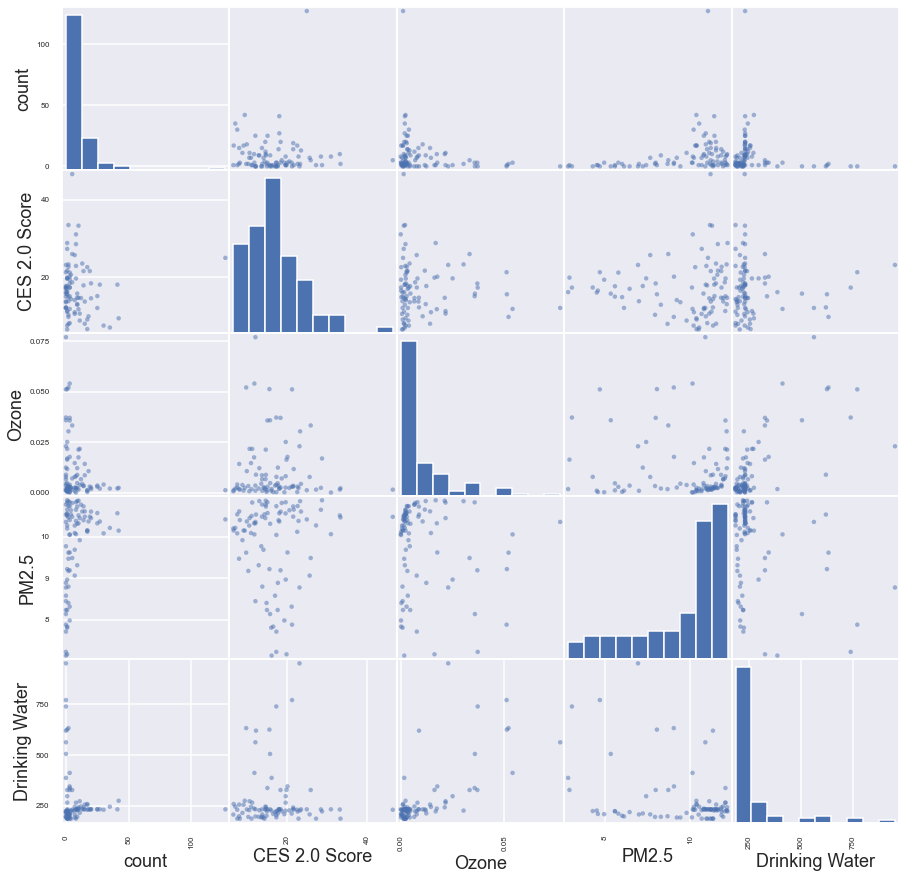

In [28]:
pd.plotting.scatter_matrix(park_env_df, figsize = (15, 15))
fig = plt.gcf()

From this matrix, we failed to distinguish an apparent distribution for each index. We can discover that these indices' distribution is highly screwed for some indices such as count and drinking water. The only index that has a higher normality is the CES 2.0 scores. Meanwhile, unfortunately, we are also not able to discover any clear linear relationships between count and other indices. We can also notice an obvious outlier, which has a value of count of more than 100. Hence we should consider removing this outlier in later analysis.

In [31]:
# removing the outlier
outlier_count = max(park_env_df['count'])
park_env_df = park_env_df.drop(index = (park_env_df.loc[park_env_df['count'] == outlier_count].index))
park_env_df.shape

(87, 5)

Now we are going to plot the new scatterplots of count with other four variables and the distribution of all these variables.

Text(0.5, 0, 'Number of Parks across different areas')

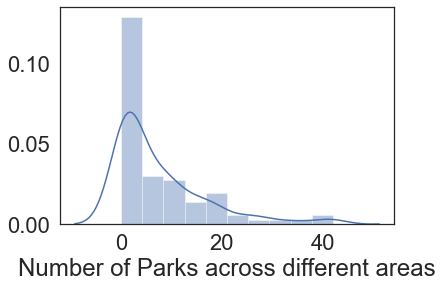

In [38]:
sns.distplot(park_env_df['count'])
plt.xlabel('Number of Parks across different areas')

Text(0.5, 0, 'CalEnviroScreen Score, indicator of pollution')

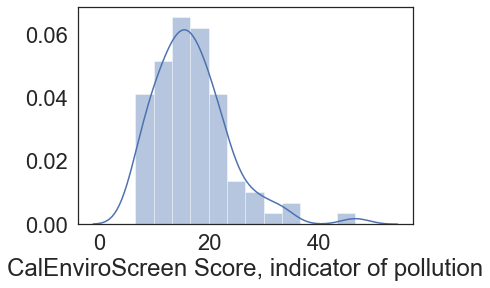

In [39]:
sns.distplot(park_env_df['CES 2.0 Score'])
plt.xlabel('CalEnviroScreen Score, indicator of pollution')

Text(0.5, 0, 'maximum 8 hour Ozone concentration over state standard')

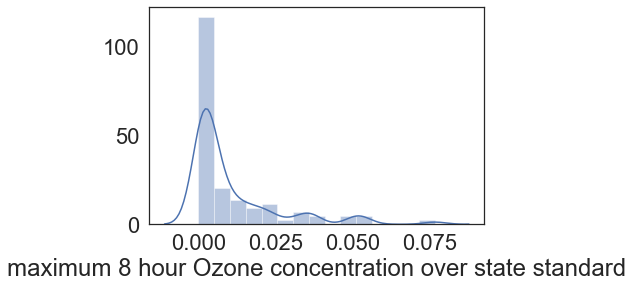

In [40]:
sns.distplot(park_env_df['Ozone'])
plt.xlabel('maximum 8 hour Ozone concentration over state standard')

Text(0.5, 0, 'Annual mean Particulate Matter 2.5 concentration')

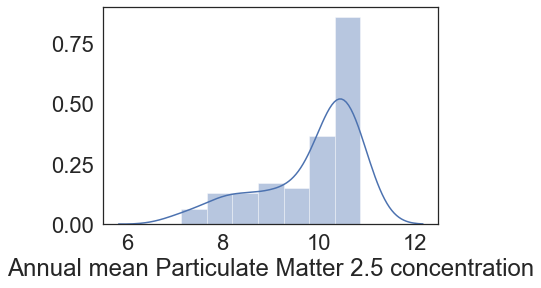

In [41]:
sns.distplot(park_env_df['PM2.5'])
plt.xlabel('Annual mean Particulate Matter 2.5 concentration')

Text(0.5, 0, 'Drinking water contaminant index for selected contaminants')

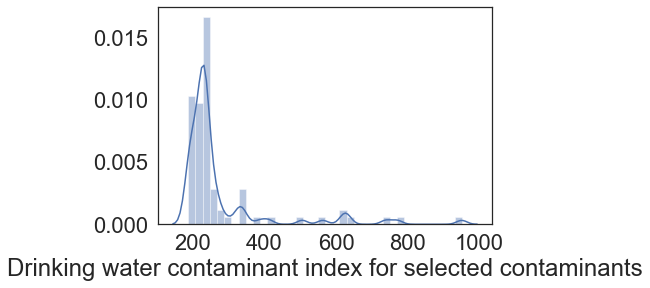

In [42]:
sns.distplot(park_env_df['Drinking Water'])
plt.xlabel('Drinking water contaminant index for selected contaminants')

Text(0, 0.5, 'CES 2.0 Score')

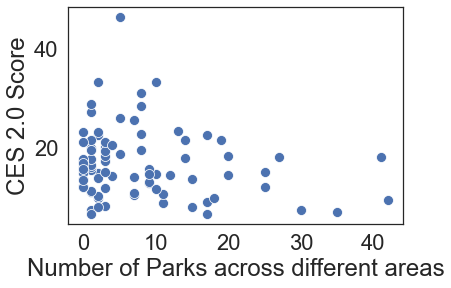

In [43]:
sns.scatterplot(x='count', y='CES 2.0 Score', data=park_env_df, s=100)
plt.xlabel('Number of Parks across different areas')
plt.ylabel('CES 2.0 Score')

Text(0, 0.5, 'Ozone')

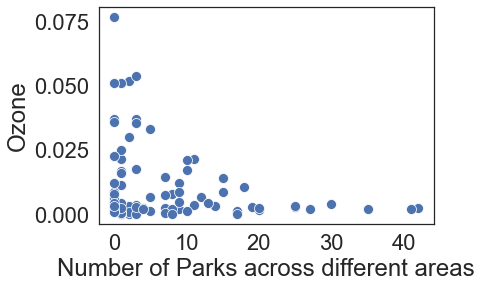

In [44]:
sns.scatterplot(x='count', y='Ozone', data=park_env_df, s=100)
plt.xlabel('Number of Parks across different areas')
plt.ylabel('Ozone')

Text(0, 0.5, 'PM2.5')

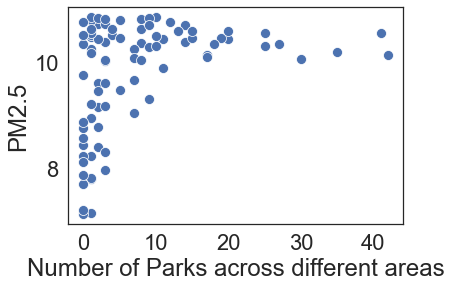

In [45]:
sns.scatterplot(x='count', y='PM2.5', data=park_env_df, s=100)
plt.xlabel('Number of Parks across different areas')
plt.ylabel('PM2.5')

Text(0, 0.5, 'Drinking Water')

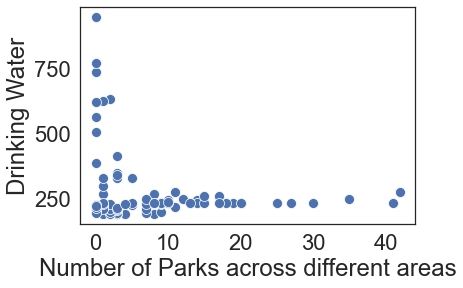

In [46]:
sns.scatterplot(x='count', y='Drinking Water', data=park_env_df, s=100)
plt.xlabel('Number of Parks across different areas')
plt.ylabel('Drinking Water')

From these plots we can see that there is no clear linear relationships between number of parks and different environmental factors. However, there seems to be some non-linear relationships between them, which is what we are going to explore in the following analysis. 

### Part 2: Linear Regression between CES Score and number of parks

I chose to use linear regression to find the relationship between CES Score and the number of parks since they are two quantitative variables. However, I wish to note one thing is that the distribution of these two variables are not normal. I attempted to transform their distribution to normal by using logrithm, square root, and inverse, but failed to acquire a nice normal distribution. As a result, I have to continue with this potential error.

In [84]:
park_env_df.columns = ['count', 'CES_Score', 'Ozone', 'PM2.5', 'Drinking_Water']

In [85]:
outcome, predictors = patsy.dmatrices('CES_Score ~ count', park_env_df)

In [86]:
mod = sm.OLS(outcome, predictors)

In [87]:
## fit the model
res = mod.fit()

## look at the results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              CES_Score   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.952
Date:                Wed, 16 Dec 2020   Prob (F-statistic):             0.0894
Time:                        16:09:55   Log-Likelihood:                -289.13
No. Observations:                  87   AIC:                             582.3
Df Residuals:                      85   BIC:                             587.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.8681      0.942     18.970      0.0

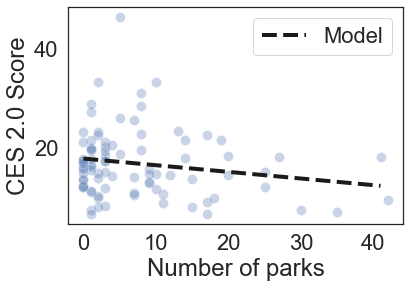

In [129]:
# Plot the orginal data (as before)
sns.scatterplot(x='count', y='CES_Score', alpha=0.3, data=park_env_df, s=100)

# Generate and plot the model fit line
xs = np.arange(park_env_df['count'].min(), park_env_df['count'].max())
ys = -0.1344 * xs + 17.8681
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Number of parks')
plt.ylabel('CES 2.0 Score')
plt.legend();

In the visualization above, we have number of parks on the x-axis and the average CES score of the area on the y-axis. The dash line with a negative slope represents the model we acquired after applying linear regression to this dataset.

From the graph and summary, we can conclude several things:
- First of all, there seems to be a weak negative relationship between number of parks and CES scores, which is reasonable since more parks should be able to reduce the pollution of the surrounding area.
- However, we can discover that the p-value of the independent variable is 0.089, which exceeded the base line of 0.05. Hence, we failed to reject the null hypothesis and can not conclude that there is a significant difference exist.

### Part 3: Regression fitting curve between number of parks and other environmental indices

By observing the exploratory data analysis, I decided to use nonlinear regression to seek any potential relationships between three different environmental indices and the nubmer of parks. The fitting function I picked is y = a*e^(-bx)+c after making various attempts, and we are albe to obtain the following results:

In [139]:
def fit_func_1(x, a, b, c):
    return a * np.exp(-b * x) + c

In [132]:
y1 = list(park_env_df['Ozone'])
x1 = list(park_env_df['count'])

In [133]:
popt1, pcov1 = curve_fit(fit_func_1, x1, y1)

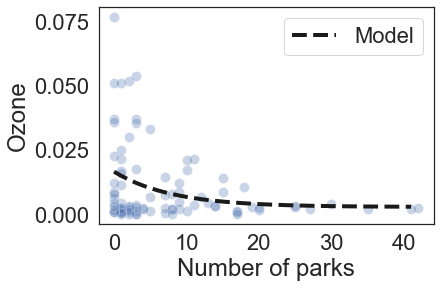

In [134]:
# Plot the orginal data (as before)
sns.scatterplot(x='count', y='Ozone', alpha=0.3, data=park_env_df, s=100)

# Generate and plot the model fit line
xs1 = np.arange(park_env_df['count'].min(), park_env_df['count'].max())
ys1 = fit_func_1(xs1, *popt1)
plt.plot(xs1, ys1, '--k', linewidth=4, label='Model')

plt.xlabel('Number of parks')
plt.ylabel('Ozone')
plt.legend();

In this visualization, we have number of parks on the x-axis and the ozone concentration on the y-axis. According to the regression fitting line, we can discover that as the number of parks increases, the ozone concentration will decrease accordingly. However, we can observe the large cluster with both low number of parks and low ozone concentration. Hence we should note that this relationship is not a strong one.

In [135]:
y2 = list(park_env_df['PM2.5'])
x2 = list(park_env_df['count'])

In [140]:
popt2, pcov2 = curve_fit(fit_func_1, x2, y2)

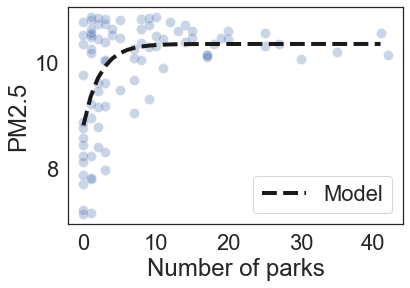

In [141]:
# Plot the orginal data (as before)
sns.scatterplot(x='count', y='PM2.5', alpha=0.3, data=park_env_df, s=100)

# Generate and plot the model fit line
xs2 = np.arange(park_env_df['count'].min(), park_env_df['count'].max())
ys2 = fit_func_1(xs2, *popt2)
plt.plot(xs2, ys2, '--k', linewidth=4, label='Model')

plt.xlabel('Number of parks')
plt.ylabel('PM2.5')
plt.legend();

In this visualization, we have number of parks on the x-axis and the PM2.5 on the y-axis. According to the regression fitting line, we can discover that as the number of parks increases,the PM2.5 index will increase accordingly and converge to approximately 11. However, we should also note that this graph also has a large cluster with high PM2.5 and low number of parks. Besides, the result we acquired from the fitting line is, to some degree, against normal reasoning since we assumed that more parks will be able to reduce the amount of PM2.5. However, it is possible that urban trees and vegetation are not good at reducing the amount of PM2.5 and number of parks is not the variable that made influences to this result. One possible explaination is that PM2.5 is lower in areas that are less urbanized and have less vehicles, and some of these areas have a rather small population and less amenities. This explained the datapoints on the graph with few parks and small amount of PM2.5 concentration.

In [124]:
y3 = list(park_env_df['Drinking_Water'])
x3 = list(park_env_df['count'])

In [125]:
popt3, pcov3 = curve_fit(fit_func_1, x3, y3)

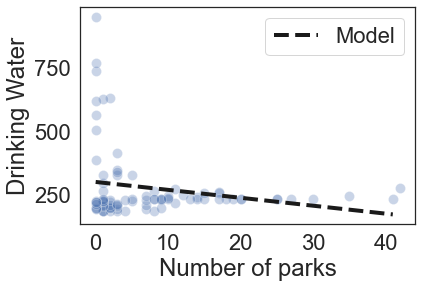

In [142]:
# Plot the orginal data (as before)
sns.scatterplot(x='count', y='Drinking_Water', alpha=0.3, data=park_env_df, s=100)

# Generate and plot the model fit line
xs3 = np.arange(park_env_df['count'].min(), park_env_df['count'].max())
ys3 = fit_func_1(xs3, *popt3)
plt.plot(xs3, ys3, '--k', linewidth=4, label='Model')

plt.xlabel('Number of parks')
plt.ylabel('Drinking Water')
plt.legend();

In this visualization, we have number of parks on the x-axis and the Drinking Water contaminent index on the y-axis. According to the regression fitting line, we can discover that as the number of parks increases,the PM2.5 index will decrease accordingly following an approximate linear fitting line. However, we can discover that this is mainly caused by the several outliers in the graph with high drinking water contaminent index and low number of parks, and we can also notice the large cluster near the origin of the coordinate. Hence, we can not conclude any significant relationships between these two variables.

# Ethics & Privacy

Following the Deon's Ethics Checklist, we have:
- We should have the permission to use the data since all the datasets we used are posted online publicly.
- There is no significant privacy concerns for our data since there is no personal information contained in both of the datasets we used. The official census data are fully anonymous while the yelp data are only used to obtain the addresses of parks in San Diego.
- There might be potential bias caused by following issues: missing of geospacial data and lack of consideration of different types of parks. These are all factors that can cause errors in our analysis
- Unfortunately, due to the mal-functioning of geopandas, we are not able to avoid the bias caused by lack of geospacial data. However, these biases will not cause any ethics or privacy issues. It will mainly lead to some errors of our results and conclusions.

# Conclusion & Discussion

### Conclusion

After analyzing the data we acquired, we failed to reject our null hypothesis. We also cannot conclude that there is a significant relationship between the number of parks and environmental pollutions. However, from the distribution and regression lines, we are able to discover some trends. Hence we can come up with the assumption that if we further perform some more detailed data analysis, it is possible and hopeful for us to find some connections between the indices.

Furthermore, we can also come up with some ideas of what we should do with parks and recreations of San Diego: since there've been plenty of formal researches proving that urban trees and vegetation in parks can help reducing air pollution, it is reasonable for us to suspect that the parks in San Diego did not have enough vegetation coverage, or the vegetation selected has limited ability to reduce pollution after failing to reject the null hypothesis. As a result, if the County wishes to improve the air quality of San Diego further, we should consider increasing the vegetation coverage or enhancing the maintenance of current vegetation to achieve our purpose of improving people's living standards.

### Limitations, Problems, and potential improvements

Overall, I will not say this project is successful since I've encountered various limitations and problems. Here are some of the problems:
- First of all, the malfunction of importing geopandas directly leads to the missing of the geospacial data in this project. One of the most significant problem caused by such missing of data is that all parks are considered as equal in this project. However, in fact, parks are various from size, scale, to function, and usage. For example, a recreation theme park may have small even negative impact toward reducing pollutions of San Diego, while a large national park with high percentage of vegetation coverage may be able to influence over more than one zip code areas. A potential solution can be, instead of counting the number of parks in each zip code area, using the ratio of park area to zip code area might be a better independent variable for our analysis.
- Secondly, there are many factors that can contribute to the pollution that are not considered in this project. One example can be that there are more vehicles in the downtown area than the suburban area, hence even with the same amount of vegetation coverage, the pollution index can be significantly different.
- Lastly, the distribution of the indices we used are not normally distributed, while performing linear regression usually ask for normality. Unfortunately, after great amount of attempts to change the distribution to normal were made, I still failed to do so.

Afterall, this is not the best result we can acquire, but I've explored various things and learned a lot from this project. Hopefully I'll be able to reduce such limitations and problems in future researches.